<a href="https://colab.research.google.com/github/abel-keya/week_7_IP_Abel_Keya_hass_consulting-_company_with_quantile_and__regularization_based_regression_tech/blob/master/Copy_of_week_7_IP_Abel_Keya_hass_consulting__company_with_quantile_and__regularization_based_regression_techniques_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning: Hass Consulting Company  real estate regression analysis with quantile and Regularization techniques 

## 1. Defining the Question

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. [dataset](http://bit.ly/IndependentProjectWeek7Dataset) description is as follows:
## Data Features
* Id 
* price  - Price of the house
* bedrooms - Number of Bedrooms
* bathrooms - Number of Bathrooms
* sqft_living - Square feet area of living area
* sqft_lot  - Square feet area of parking Layout
* floors - Number of Floors
* waterfront - Whether waterfront is there or not
* view - Number of Views
* grade - Grades
* sqft_above
* sqft_basement - Square feet area off basement
* yr_built - Year the house is built
* yr_renovated - Year the house is renovated
* zipcode - zipcode os the house
* lat : Latitude of the house
* lon : Longitude of the house
* sqft_living15
* sqft_lot15

## a) Specifying the Question

 A prediction house prices using the Quantile and Regularization based  regression models

## b) Defining the Metric for Success
* Clean dataset
* Multiple Linear Regression model
* Quantile Regression model
* Ridge Regression model
* Lasso Regression model
* Elastic Net Regression model

# c) Understanding the context 

####  perform modeling using the given regression techniques then evaluate their performance. 
#### provide  observations and recommendation on the suitability of each of the tested models on their appropriateness of solving the given problem. 

* Multiple Linear Regression
* Quantile Regression
* Ridge Regression
* Lasso Regression
* Elastic Net Regression
### Required to perform each of the following:
* Find and deal with outliers, anomalies, and missing data within the dataset.
* Perform univariate, bivariate and multivariate analysis recording your observations.
* Performing regression analysis.
* Incorporate categorical independent variables into your models.
* Check for multicollinearity
* Provide a recommendation based on your analysis. 
* Create residual plots for your models, and assess heteroskedasticity using Barlett's test.
* Challenge your solution by providing insights on how you can make improvements in model improvement.

## d) Recording the Experimental Design
* Data preparation
* Data analysis
* Data modeling

## e) Data Relevance
The data was appropriate for the regression analysis that was needed.

# 2. Reading the Data

In [0]:
# Loading libraries
import numpy as np
import pandas as pd
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Loading the Dataset
hass=pd.read_csv('Independent Project Week 7 - house_data.csv')
hass

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## 3. Checking the Data

In [0]:
# Determining the no. of records in our dataset
hass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [0]:
# Previewing the top of our dataset
hass.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
# Previewing the bottom of our dataset
hass.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [0]:
# Checking whether each column has an appropriate datatype
hass.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [0]:
hass['yr_built'].count

<bound method Series.count of 0        1955
1        1951
2        1933
3        1965
4        1987
         ... 
21608    2009
21609    2014
21610    2009
21611    2004
21612    2008
Name: yr_built, Length: 21613, dtype: int64>

In [0]:
hass['yr_renovated'].sample(10).count

<bound method Series.count of 20565    0
18174    0
8287     0
13112    0
14968    0
2534     0
14329    0
13148    0
9042     0
13361    0
Name: yr_renovated, dtype: int64>

## 4. External Data Source Validation

### a.Validation
The data was validated against datasets at [Residential Property Price indicators](https://data.opendatasoft.com/explore/dataset/residential-property-price-indicators%40public/table/?disjunctive.country&disjunctive.indicator_name&sort=date)

## 5. Tidying the Dataset

In [0]:
#checking the shape of teams dataset
hass.shape

(21613, 20)

In [0]:
#description of numeric data columns
hass.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [0]:
#determining the tatol records per column
hass.count()

id               21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

In [0]:
# Checking for the number unique values
hass.nunique()

id               21436
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

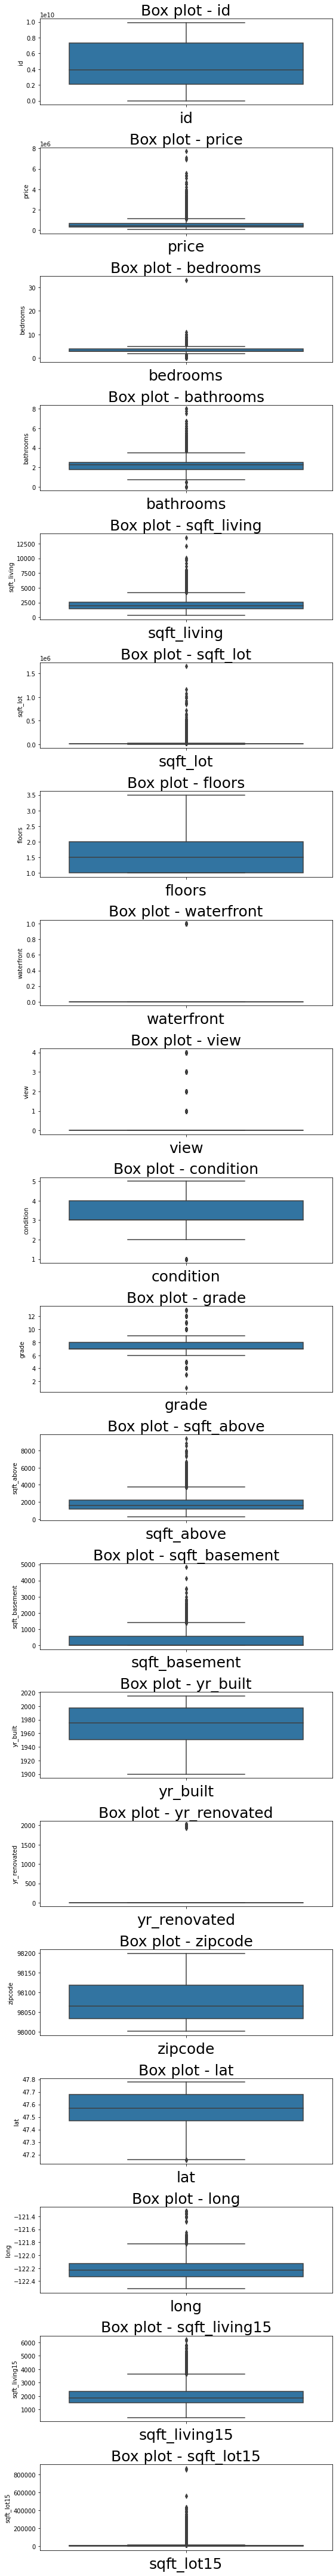

In [0]:
#checking for outliers in the dataset
col_names = numeric_clmns = hass.dtypes[hass.dtypes != "object" ].index

fig, ax = plt.subplots(len(col_names), figsize=(8,60))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=hass[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=25)
    ax[i].set_xlabel(col_val, fontsize=25)

plt.tight_layout()
plt.show()

In [0]:
# Identifying the Missing Data
hass.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [0]:
# More data cleaning procedures


1.converting the date and rank_date into date type

In [0]:
#confirmation of datatype
hass.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

3.removing whitespace from column names

In [0]:
# replace spaces in the data set column names
hass.rename(columns=lambda x: x.strip().replace(" ", ""), inplace=True)
# confirm changes
hass.head(1)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


4.Categorical variable encoding

In [0]:
#create a copy of the data
housing_data=hass.copy()

In [0]:
#preview the to of the data
housing_data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
#list of columns
housing_data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [0]:
#random sampling to confirm the dataset changes
housing_data.sample(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
20824,191100435,1600000.0,5,3.75,3570,10125,2.0,0,0,3,10,3570,0,2014,0,98040,47.5639,-122.223,1760,10125
9406,2026079055,380000.0,1,1.50,1200,44866,1.5,0,0,3,7,1200,0,1983,0,98019,47.7205,-121.930,1480,67082
19777,8084900160,2640000.0,5,4.25,4660,16200,2.0,0,2,3,11,4660,0,2005,0,98004,47.6326,-122.216,3340,16200
229,7202340400,516500.0,3,2.50,1480,4729,2.0,0,0,3,7,1480,0,2004,0,98053,47.6794,-122.034,2250,4729
15793,7013200280,989000.0,6,4.50,3830,4800,3.0,0,0,3,9,3050,780,1919,2004,98119,47.6404,-122.361,1990,4800
3349,1423089055,845000.0,4,2.75,4070,115434,2.0,0,0,3,9,4070,0,2002,0,98045,47.4843,-121.752,2970,95832
21450,8562790720,749950.0,4,3.50,2630,3757,2.0,0,0,3,10,2200,430,2008,0,98027,47.5322,-122.075,2620,2699
8362,7937600395,782000.0,4,3.50,5270,53428,2.0,0,0,3,10,3440,1830,2004,0,98058,47.4358,-122.085,2340,30904
8307,8656300385,305000.0,3,1.00,1710,19115,1.0,0,0,3,6,1710,0,1986,0,98014,47.6560,-121.913,1650,15144
11618,3629960550,450000.0,3,3.25,1770,1863,2.0,0,0,3,8,1430,340,2003,0,98029,47.5478,-122.005,1410,1375


# 6. Exploratory Analysis

In [0]:
# Ploting the univariate summaries and recording our observations

# 1. Distribution plots for the Variables

In [0]:
housing_data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

Text(0.5, 1.0, 'Bar graph of grade')

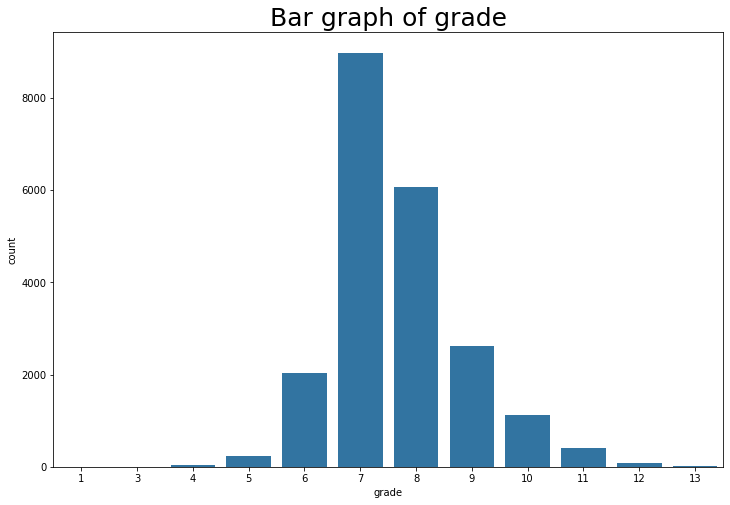

In [0]:
# create the plot
base_color = sns.color_palette()[0]
fig, axes = plt.subplots(figsize=(12,8))
sns.countplot(data = housing_data, x = 'grade', color = base_color)

# add annotations
n_points = housing_data.shape[0]
cat_counts = housing_data['grade'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels
plt.title('Bar graph of grade',fontsize=25)

Text(0.5, 1.0, 'Bar graph of floors')

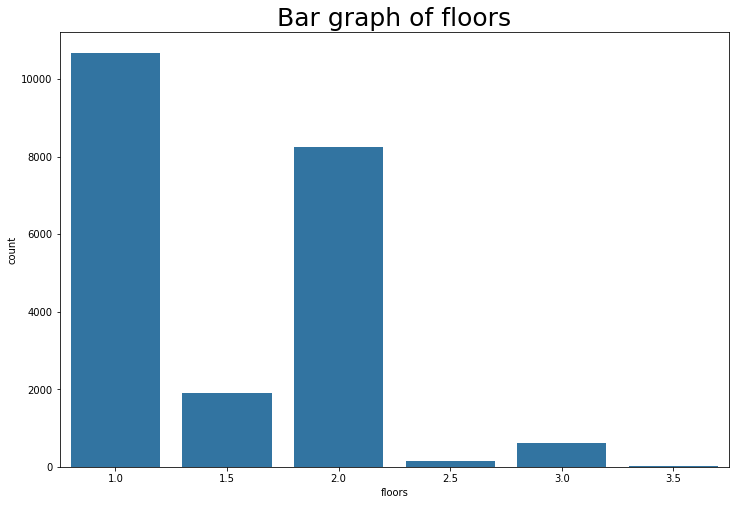

In [0]:
# create the plot
base_color = sns.color_palette()[0]
fig, axes = plt.subplots(figsize=(12,8))
sns.countplot(data = housing_data, x = 'floors', color = base_color)

# add annotations
n_points = housing_data.shape[0]
cat_counts = housing_data['floors'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels
plt.title('Bar graph of floors',fontsize=25)

Text(0.5, 1.0, 'Bar graph of bedrooms')

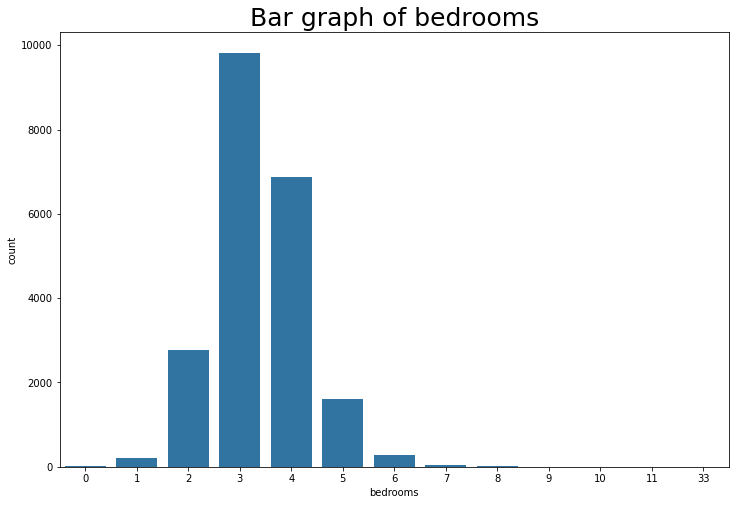

In [0]:
# create the plot
base_color = sns.color_palette()[0]
fig, axes = plt.subplots(figsize=(12,8))
sns.countplot(data = housing_data, x = 'bedrooms', color = base_color)

# add annotations
n_points = housing_data.shape[0]
cat_counts = housing_data['bedrooms'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels
plt.title('Bar graph of bedrooms',fontsize=25)

Text(0.5, 1.0, 'Bar graph of bathrooms')

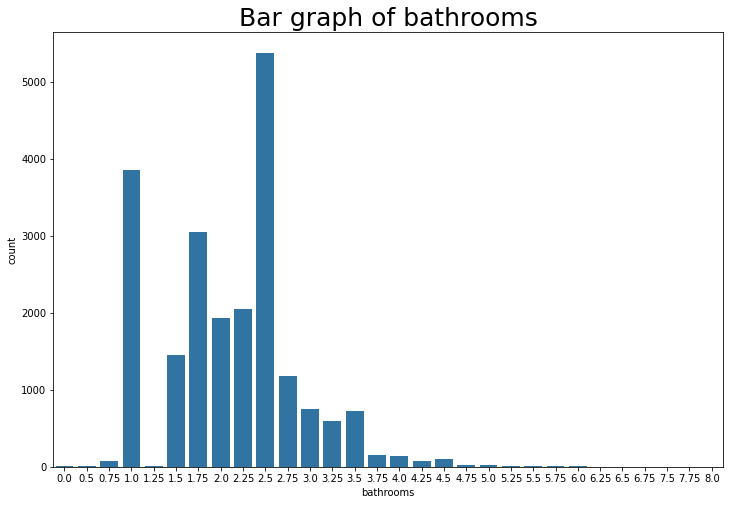

In [0]:
# create the plot
base_color = sns.color_palette()[0]
fig, axes = plt.subplots(figsize=(12,8))
sns.countplot(data = housing_data, x = 'bathrooms', color = base_color)

# add annotations
n_points = housing_data.shape[0]
cat_counts = housing_data['bathrooms'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels
plt.title('Bar graph of bathrooms',fontsize=25)

Text(0.5, 1.0, 'Pie chart to show the proportion of house conditions')

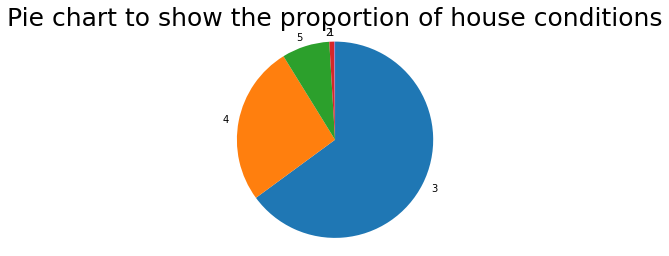

In [0]:
# code for the pie chart seen above
sorted_counts = housing_data['condition'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.axis('square')
plt.title('Pie chart to show the proportion of house conditions',fontsize=25)

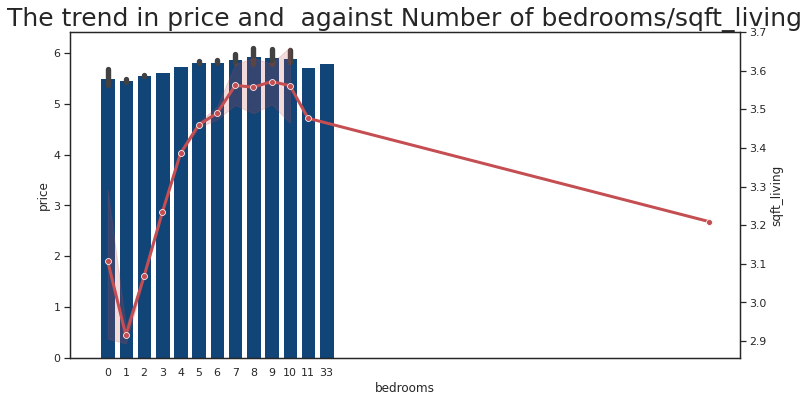

In [0]:
sns.set(style="white", rc={"lines.linewidth": 3})
#transform the data data in y axis
def log_trans(y, inverse = False):
    if not inverse:
        return np.log10(y)
    else:
        return np.power(10, y)
fig, ax1 = plt.subplots(figsize=(12,6))
ax2 = ax1.twinx()
sns.barplot(x=housing_data['bedrooms'],
            y=housing_data['price'].apply(log_trans), 
            color='#004488',
            ax=ax1)
sns.lineplot(x=housing_data['bedrooms'], 
             y=housing_data['sqft_living'].apply(log_trans),
             color='r',
             marker="o",
             ax=ax2)
plt.title('The trend in price and  against Number of bedrooms/sqft_living',fontsize=25)
plt.show()
sns.set()
#### The increase in price is directly proportional to both the increase in area and increase in the number of  bedrooms

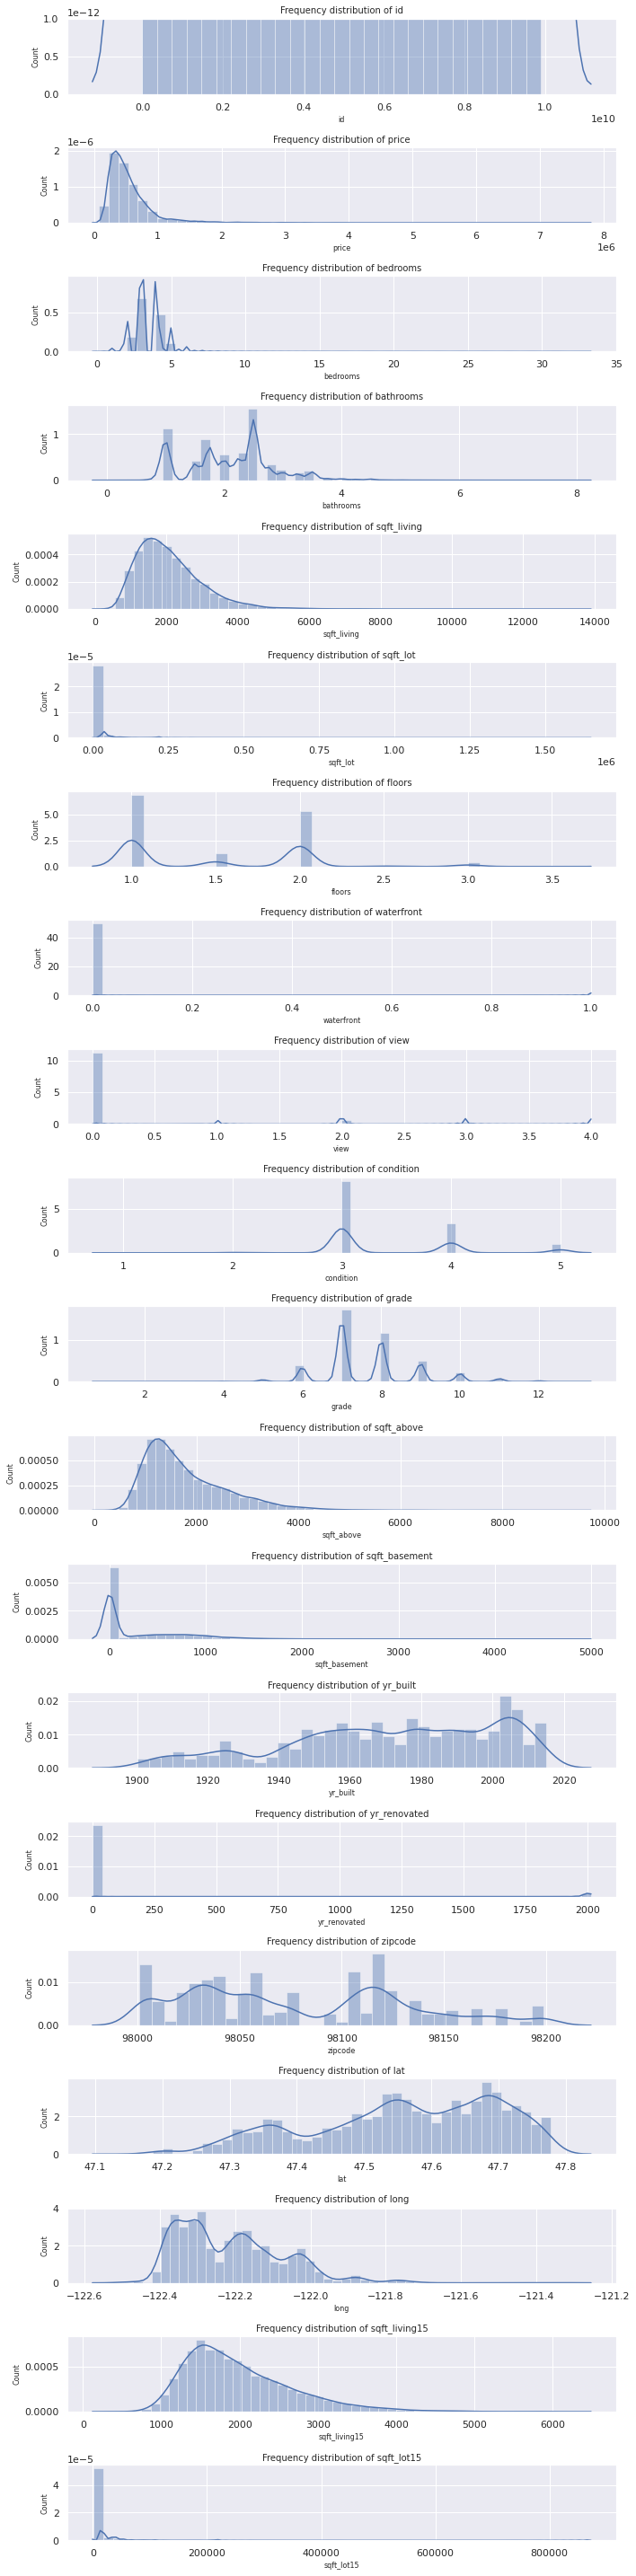

In [0]:
#importing the warnings library
import warnings
warnings.filterwarnings('ignore')
# Plotting distribution of numerical variables
col_names = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']
fig, ax = plt.subplots(len(col_names), figsize=(10,40))

for i, col_val in enumerate(col_names):

    sns.distplot(housing_data[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    
plt.tight_layout()
plt.show();

# 2. Correlation matrix for the variables

<function matplotlib.pyplot.show>

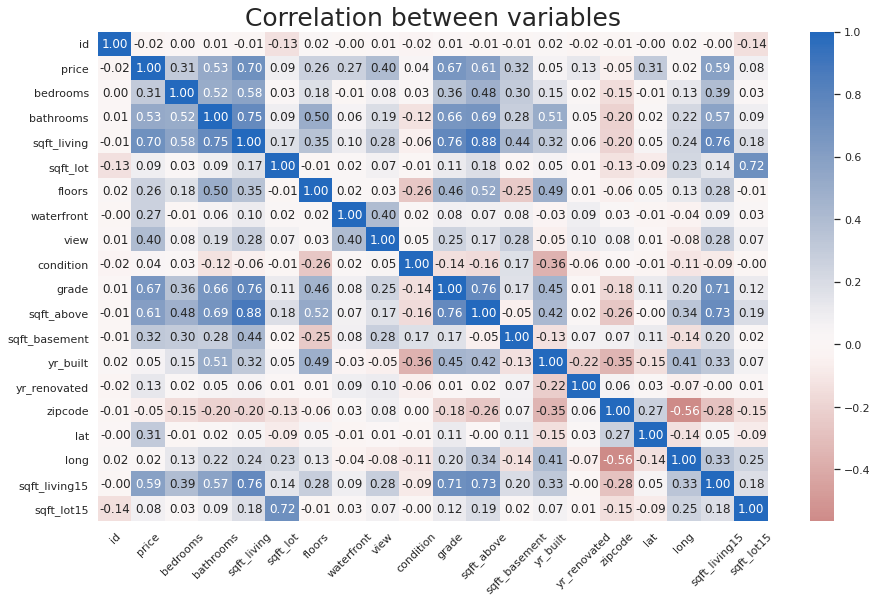

In [0]:
plt.figure(figsize=(15,9))
sns.heatmap(housing_data.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
#correlation_matrix=teams_data.corr(method = 'spearman')
#sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns, annot = True)
plt.xticks( rotation=45)
plt.title('Correlation between variables',fontsize=25)
plt.show

# Observations from the univariate plots 

###  1.Distribution
 
* unimodal distribution-price,sqrft_lot,waterfront and sqft_above have an almost perfect nomarl distribution
* long,bathrooms,floors,view,condition,grade,year_built, yr_renovated and lat have multimodal distribution
* bimodal distribution- bedrooms,zipcode and id have bimodal distribution

###  2.Skewness 

* left skewed-condition,grade,yr_built and lat 
* right skewed-price,sqft_living,sqft_lot,waterfront,view,sqft_above,year_renovated,long and sqft_living

###  3.Correlation

From the heatmap there is moderate corerelation of above 7.0 between the following pairs of features:
* grade-price
* bathrooms-sqft_living15
* grade-sqft_living15
* sqrt_above-sqft_living

###  4.Trends

* The price increases with the increase in beds/sqft_living 
* The most common houses have 
>  * 3 bedrooms 
>  * 1 floor
>  * grade 7
>  *  less than 3 bathrooms

# 7. Implementing the Solution

# **Detecting multicollinearity**

In [0]:
# correlations between the variables
correlations = housing_data.corr()
correlations

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016797,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016797,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,0.053982,0.126442,-0.053168,0.306919,0.021571,0.585374,0.082456
bedrooms,0.001286,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


# VIF score to detect multicollinearity for the dataset

In [0]:
#dataframe with the inverse of the correlations matrix for housing data
#use these correlations to compute the VIF score for each variable
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.028542,0.033760,0.002267,-0.005352,9.295241e-03,0.077219,-0.011600,0.002765,-0.037849,0.022078,-0.048373,1.019747e-02,-1.098595e-02,0.023615,0.017859,0.000315,0.007458,-0.072914,0.009239,0.105511
price,0.033760,3.331694,0.301926,-0.287621,-1.059816e+00,-0.045685,-0.033158,-0.457218,-0.369007,-0.155106,-1.024505,-4.024468e-01,-9.300384e-02,0.699138,-0.071608,0.282609,-0.757054,0.272064,-0.134388,0.098140
bedrooms,0.002267,0.301926,1.679425,-0.487234,-2.914374e-01,0.045161,0.046698,0.021795,0.080697,-0.064841,0.214235,-7.339783e-01,-3.968862e-01,0.197843,0.038950,0.105724,-0.017829,0.042108,0.013026,0.094213
bathrooms,-0.005352,-0.287621,-0.487234,3.375628,-4.983419e+00,-0.020368,-0.672186,0.049214,-0.009708,-0.123686,-0.179471,3.339955e+00,1.373944e+00,-0.996174,-0.253644,0.017405,0.024363,0.030747,0.103709,0.062751
sqft_living,0.009202,-1.054373,-0.288261,-4.978829,-3.384707e+13,-0.106878,0.527039,0.597696,-0.479097,-0.315069,-0.453843,3.051743e+13,1.631011e+13,1.445337,0.088412,-0.235969,0.262880,-0.210571,-0.942696,-0.214327
sqft_lot,0.077219,-0.045685,0.045161,-0.020368,-1.071586e-01,2.109017,0.044866,0.034139,-0.056515,0.034475,-0.042674,-8.142180e-02,1.746460e-02,0.090425,0.023829,-0.006678,0.064889,-0.142610,0.166587,-1.452768
floors,-0.011600,-0.033158,0.046698,-0.672186,5.283104e-01,0.044866,2.012361,-0.000812,-0.036580,0.090957,-0.220239,-9.665754e-01,3.676039e-01,-0.488619,-0.080094,-0.173551,-0.120268,0.162189,0.273838,0.070537
waterfront,0.002765,-0.457218,0.021795,0.049214,5.972879e-01,0.034139,-0.000812,1.266565,-0.442151,0.008786,0.189562,-4.636230e-01,-2.087473e-01,-0.116876,-0.055442,-0.016250,0.113898,-0.010443,0.072970,-0.031186
view,-0.037849,-0.369007,0.080697,-0.009708,-4.781436e-01,-0.056515,-0.036580,-0.442151,1.477161,-0.005080,-0.070505,6.198854e-01,4.047917e-02,0.073637,-0.032922,-0.171895,0.201833,0.043886,-0.311082,-0.021830
condition,0.022078,-0.155106,-0.064841,-0.123686,-3.142170e-01,0.034475,0.090957,0.008786,-0.005080,1.257240,-0.007632,4.023978e-01,8.181785e-02,0.529381,0.210433,0.148053,0.099266,-0.021435,0.082361,-0.030419


####  rankyear,martchyear,matchmonth,matchweek,matchday have VIF greater than 5 ranging between 8-41

# **Residual plots and heteroskedasticity testing**

In [0]:
housing_data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [0]:
data=housing_data[['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]
data.head(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# obtaining the residuals for the model 1 data using Linear regression

In [0]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = data.drop(['price'],axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# This is our prediction for admission based on our model
y_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset
residuals = np.subtract(y_predict, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

,price
count,4.323000e+03
mean,4.544492e+03
std,1.904908e+05
min,-3.207548e+06
25%,-7.229705e+04
50%,1.199283e+04
75%,1.012643e+05
max,1.033708e+06


In [0]:
residuals.mean()

4544.491901155815

means values between 0 and 1.(0-100%) model gives 0.017235(1.7%)


# Residual plot 1

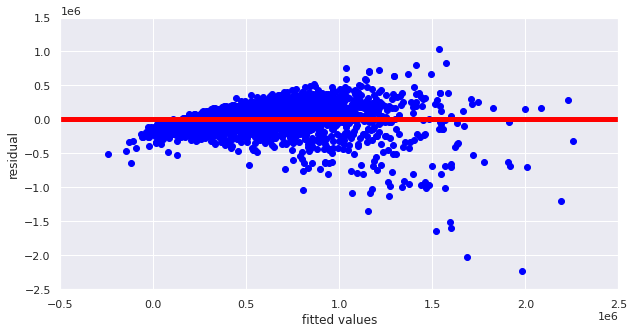

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 5))
plt.scatter(y_predict, residuals, color='blue')
plt.ylim(-2500000, 1500000)
plt.xlim(-500000, 2500000)
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=5)
plt.show()

#### residual plots forms funnel shape

# **performing a heteroskedasticity test using bartlett's test.**

-Null Hypothsis:
**The variance is equal for all our datapoints**

-Alternative Hypothesis:
**The variance is different for at least one pair of datapoints.**

In [0]:
#importing the library
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

#  compute a critical value of the chi squared distribution which helps to interpret the results 
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(p_value)

# If the test_result is greater than the critical value, then the null hypothesis rejected. 
#This would mean that there are patterns to the variance of the data

# the null hypothesis that the variance is homogeneous across the data is accepted

if (test_result > critical_value):
  print('The variances are unequal, and the model should be reassessed')
else:
  print('The variances are homogeneous!')

1.0947746542096717e-189
The variances are homogeneous!


In [0]:
# Implementing the Solution using the models

## Linear Regression

In [0]:
#data for model 2
X = data.drop(['price'],axis=1)
y = data[['price']]
X.shape,y.shape

((21613, 19), (21613, 1))

In [0]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
#Fitting the Linear Regression to the dataset  
from sklearn.linear_model import LinearRegression  
lreg= LinearRegression()  
lreg.fit(X,y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
from pandas import Series, DataFrame
print('--------Trainig Linear Regression Model---------------')
lreg = LinearRegression()
#training the model
lreg.fit(X_train,y_train)

#predicting on cv
pred = lreg.predict(X_train)

#calculating mse
mse = np.mean((pred - X_train)**2)
print('\nMean Sqaured Error are:\n ', mse )

#Let us take a look at the coefficients of this linear regression model.
# calculating coefficients
#coeff = DataFrame(X.columns)

#coeff['Coefficient Estimate'] = Series(lreg.coef_)

#print(coeff)  


--------Trainig Linear Regression Model---------------

Mean Sqaured Error are:
  id               2.903713e+19
bedrooms         3.920281e+11
bathrooms        3.920294e+11
sqft_living      3.892929e+11
sqft_lot         3.746605e+11
floors           3.920303e+11
waterfront       3.920320e+11
view             3.920315e+11
condition        3.920283e+11
grade            3.920231e+11
sqft_above       3.897175e+11
sqft_basement    3.916064e+11
yr_built         3.898948e+11
yr_renovated     3.918969e+11
zipcode          2.951616e+11
lat              3.919804e+11
long             3.921647e+11
sqft_living15    3.895800e+11
sqft_lot15       3.773511e+11
dtype: float64


In [0]:
#there is little difference between the ridge and baseline models. 
# This is confirmed with the coefficients of each model found below.
# 
coef_dict_baseline = {}
for coef, feat in zip(lreg.coef_,X_train.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'id': array([-1.10002041e-06, -3.47086520e+04,  3.94764525e+04,  1.12633767e+02,
         1.69978225e-01,  7.50715212e+03,  6.05646505e+05,  5.29339125e+04,
         2.60815035e+04,  9.38049927e+04,  7.27528553e+01,  3.98809114e+01,
        -2.61195676e+03,  1.99770814e+01, -5.67566052e+02,  6.04601426e+05,
        -2.20882843e+05,  2.41608083e+01, -4.78704250e-01])}

In [0]:
# This is our prediction for admission based on our model
y_predict = regressor.predict(X_test)

# create the residual by substracting the test value from the predicted value for each row in our dataset
print(y_predict, y_test)

[ 381894.27176422 1542558.95540676  546553.73056015 ...  364813.81945969
  203411.04660748  438546.57434692]            price
17384   297000.0
722    1580000.0
2680    562100.0
18754   631500.0
14554   780000.0
...          ...
5427    844000.0
16547   335500.0
4585    369950.0
17762   300000.0
16323   575950.0

[4323 rows x 1 columns]


In [0]:
print('\n\nModel performance on Test data = ')
print(lreg.score(X_train,pred))



Model performance on Test data = 
1.0


## Quantile Regression

In [0]:
hass.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [0]:
#Creating target and features
X = hass.drop(['price'],axis=1).values
y = hass['price'].values
X.shape,y.shape

((21613, 19), (21613,))

In [0]:
#train and test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
#checking features train and test shape
X_train.shape,X_test.shape

((15129, 19), (6484, 19))

In [0]:
#checking target train and test shapes
y_train.shape,y_test.shape

((15129,), (6484,))

In [0]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#scalling the data
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_Y = StandardScaler()
y_trainS = sc_Y.fit_transform(y_train.reshape(-1,1))
y_testS = sc_Y.transform(y_test.reshape(-1,1))

In [0]:
#checking  the scaled feature train data
X_train[0:1]

array([[-0.53412961,  0.67170039, -0.79711466, -0.74522967, -0.19007787,
        -0.91951092, -0.09016396, -0.30759897, -0.62526207, -0.55577141,
        -0.77750861, -0.09348374, -0.20146496, -0.21187199,  1.03727271,
         1.17348387, -0.83797629, -0.51711194, -0.18693515]])

In [0]:
#checking  the scaled feature test data
X_test[0:1]

array([[-1.08577268, -1.44563583, -0.79711466, -0.70193254, -0.32165525,
         2.76632884, -0.09016396, -0.30759897, -0.62526207, -0.55577141,
        -0.42904222, -0.65768706,  0.95034622, -0.21187199,  0.88741047,
         1.17204161, -0.53947092, -0.80859495, -0.40833942]])

In [0]:
#checking  the scaled target train data
y_trainS[0:1]

array([[-0.38454812]])

In [0]:
#checking  the scaled target test
y_testS[0:1]

array([[-0.66605806]])

In [0]:
#Checking mean and standard of the X_train data at column 4
print("mean = " + str(np.mean(X_train[:,4])))
print("std = " + str(np.std(X_train[:,4])))

mean = -1.1506574807404624e-17
std = 1.0000000000000002


## performing PCA for feature reduction and independence

In [0]:
#importing the neccessary libraries
from scipy.stats import spearmanr
from statsmodels.graphics.gofplots import qqplot
plt.style.use('bmh')
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.decomposition import PCA
import statsmodels.formula.api as sm
from statsmodels.regression.quantile_regression import QuantReg
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

In [0]:
#PCA with 5 principal components
pca = PCA(n_components = 5)
principalComponents = pca.fit_transform(X_train)
principalComponentsTest = pca.transform(X_test)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PrincComp_1', 'PrincComp_2','PrincComp_3','PrincComp_4','PrincComp_5'])
principalDftest = pd.DataFrame(data = principalComponentsTest
             , columns = ['PrincComp_1', 'PrincComp_2','PrincComp_3','PrincComp_4','PrincComp_5'])

In [0]:
#getting PCA component variance ratio
print('Variance explained by all components: ' + str(pca.explained_variance_ratio_.sum()))
pca.explained_variance_ratio_

Variance explained by all components: 0.6282751474170121


array([0.27482271, 0.11606812, 0.09971835, 0.07284403, 0.06482194])

In [0]:
#creating Principal dataframe for target training dataframe
principalDf['price'] = y_trainS 

In [0]:
# importing the statsmodels library
import statsmodels.formula.api as sm
# creating a startsmodel formula using principal components and target training dataframe
mod = sm.quantreg('price ~ PrincComp_1 + PrincComp_2 + PrincComp_3 + PrincComp_4 + PrincComp_5', principalDf)
#fitting the QUantile Regression model using the quantreg package
res = mod.fit(q=.5)
#results summary 
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3592
Model:                       QuantReg   Bandwidth:                     0.07896
Method:                 Least Squares   Sparsity:                        1.004
Date:                Mon, 08 Jun 2020   No. Observations:                15129
Time:                        14:13:41   Df Residuals:                    15123
                                        Df Model:                            5
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0792      0.004    -19.410      0.000      -0.087      -0.071
PrincComp_1     0.2174      0.002    121.759      0.000       0.214       0.221
PrincComp_2     0.2402      0.003     87.421      0.000       0.235       0.246
PrincComp_3     0.0184      0.003      6.218   

In [0]:
# make the predictions by the model
pred = res.predict(principalDftest) 
y_pred = sc_Y.inverse_transform(pred)

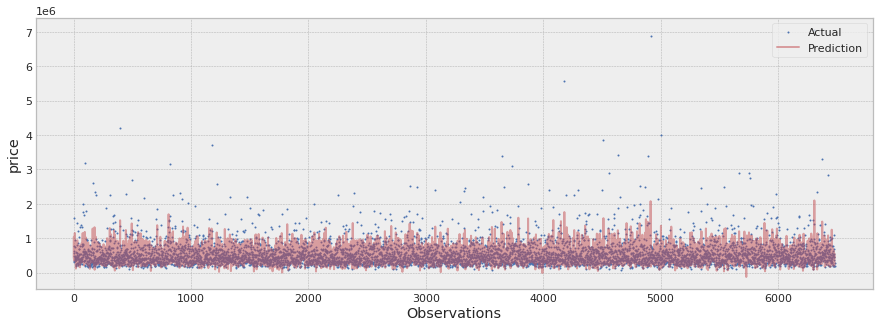

In [0]:
# Plot the y_test and the prediction (y_pred)
fig = plt.figure(figsize=(15, 5))
plt.plot(np.arange(0,len(y_test),1), y_test, 'b.', markersize=2, label='Actual')
plt.plot(np.arange(0,len(y_test),1), y_pred, 'r-', label='Prediction', alpha =.5)
plt.xlabel('Observations')
plt.ylabel('price')
#plt.ylim(-10, 20)
plt.legend(loc='upper right');

Observations sorted by y_test values, i.e. higher index => higher SalePrice value


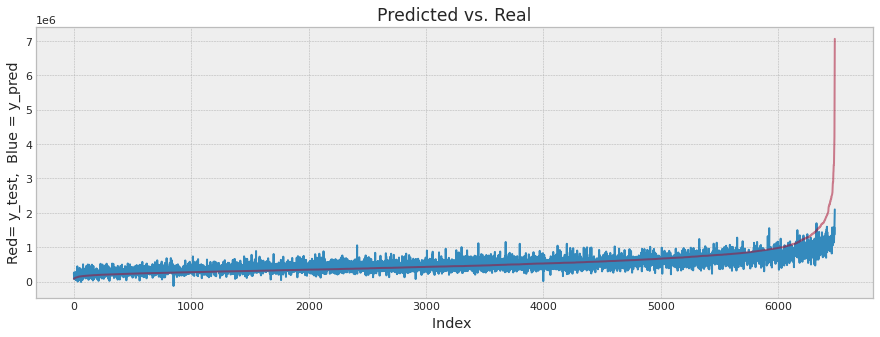

In [0]:
#Visualizing the predicted vs actual values
predicted_df = pd.DataFrame({'y_test':y_test,'y_pred': y_pred})
predicted_df.sort_values(by=['y_test'],inplace=True)
fig = plt.figure(figsize=(15, 5))
plt.plot(np.arange(0,len(predicted_df),1), predicted_df['y_pred'])
plt.plot(np.arange(0,len(predicted_df),1), predicted_df['y_test'], alpha=0.5)
#plt.ylim(0,500000)
plt.ylabel('Red= y_test,  Blue = y_pred')
plt.xlabel('Index ')
plt.title('Predicted vs. Real');
print('Observations sorted by y_test values, i.e. higher index => higher SalePrice value');

Observations sorted by y_test values, i.e. higher index => higher Price value


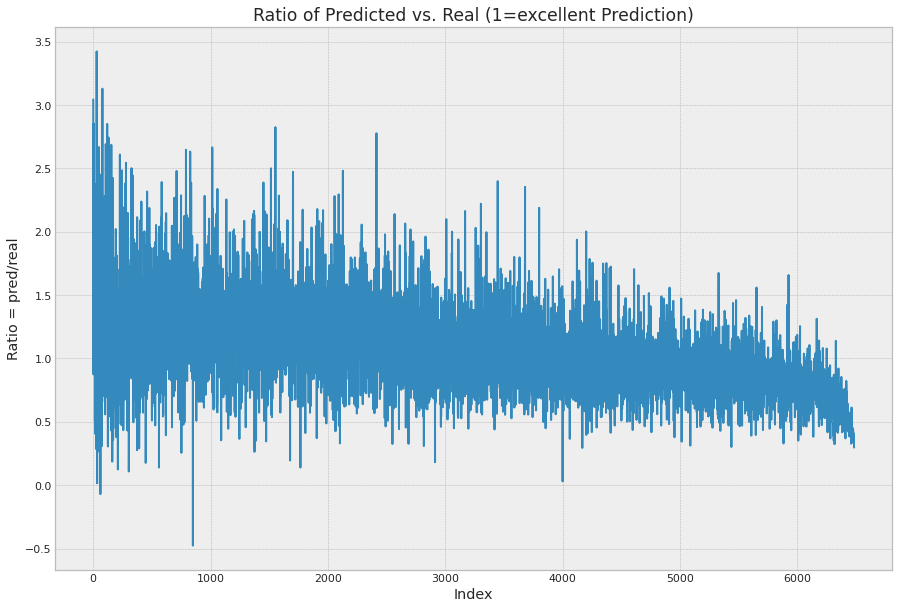

In [0]:
#visualising ratio of predicted vs actual
fig = plt.figure(figsize=(15, 10))
plt.plot(np.arange(0,len(predicted_df),1), predicted_df['y_pred']/predicted_df['y_test'])
plt.ylabel('Ratio = pred/real')
plt.xlabel('Index')
plt.title('Ratio of Predicted vs. Real (1=excellent Prediction)');
print('Observations sorted by y_test values, i.e. higher index => higher Price value');

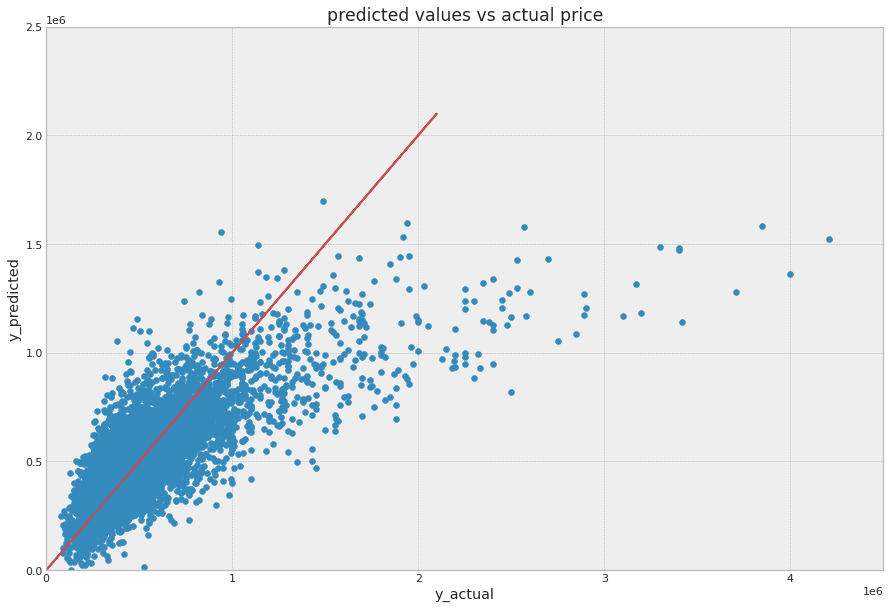

In [0]:
#scatterplot visualization of predicted values
fig = plt.figure(figsize=(15, 10))
plt.scatter(y_test, y_pred)
plt.ylim(-1, 2500000)
plt.xlim(-1, 4500000)
plt.plot(y_pred, y_pred, "r")
plt.xlabel('y_actual')
plt.title('predicted values vs actual price')
plt.ylabel('y_predicted');

In [0]:
## Similarly we can do the models for other quantiles
# 
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['PrincComp_1']] + res.conf_int().loc['PrincComp_1'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

     qt  intercept  x_coef  cf_lower_bound  cf_upper_bound
0 0.100     -0.566   0.146           0.144           0.148
1 0.200     -0.434   0.164           0.161           0.166
2 0.300     -0.310   0.183           0.180           0.186
3 0.400     -0.196   0.197           0.194           0.200
4 0.500     -0.079   0.217           0.214           0.221
5 0.600      0.037   0.228           0.225           0.232
6 0.700      0.169   0.246           0.241           0.250
7 0.800      0.339   0.268           0.262           0.273
8 0.900      0.646   0.322           0.314           0.330


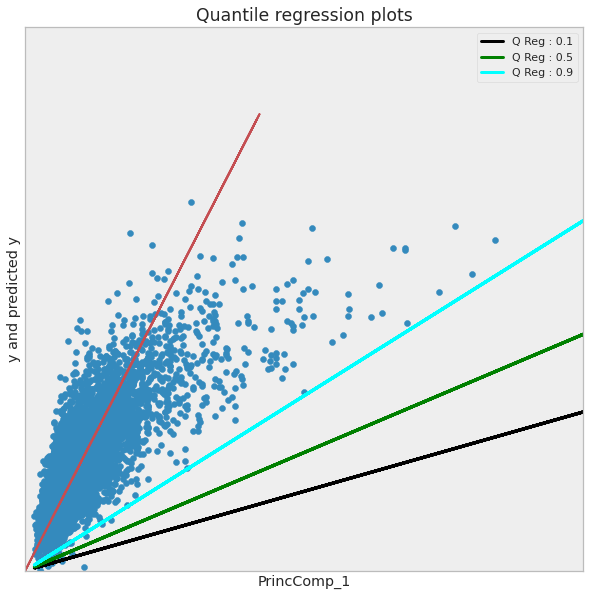

In [0]:
#plot 0.1th, 0.5th and 0.9th quantile models against our original data.
# 
#scatterplot visualization of predicted values
fig = plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred)
plt.ylim(-1, 2500000)
plt.xlim(-1, 5000000)
plt.plot(y_pred, y_pred, "r")
y_pred3 = models[0].params['Intercept'] + models[0].params['PrincComp_1'] *y_test
plt.plot(y_test, y_pred3, color='black',
         linewidth=3, label='Q Reg : 0.1')

y_pred4 = models[4].params['Intercept'] + models[4].params['PrincComp_1'] * y_test
plt.plot(y_test, y_pred4, color='green',
         linewidth=3, label='Q Reg : 0.5')


y_pred5 = models[8].params['Intercept'] + models[8].params['PrincComp_1'] * y_test
plt.plot(y_test, y_pred5, color='cyan',
         linewidth=3, label='Q Reg : 0.9')

plt.xticks(())
plt.yticks(())
plt.xlabel("PrincComp_1")
plt.ylabel("y and predicted y")
plt.title("Quantile regression plots")
plt.legend()

<Figure size 432x288 with 0 Axes>

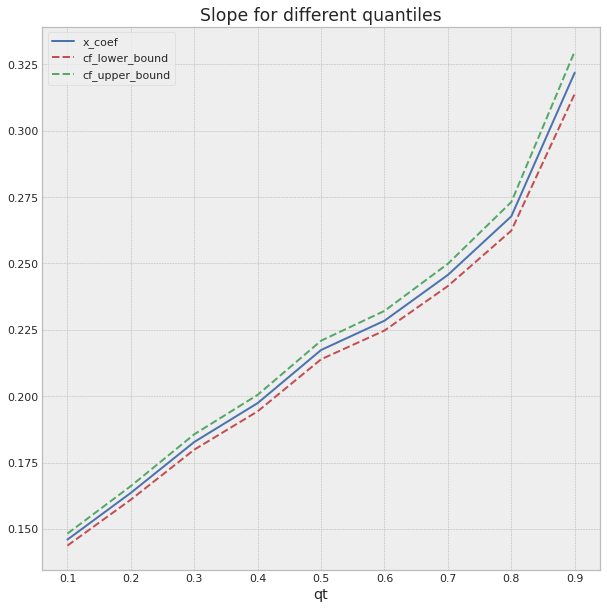

In [0]:
plt.figure(6)
params.plot(x = 'qt', y = ['x_coef','cf_lower_bound', 'cf_upper_bound'], 
	title = 'Slope for different quantiles', kind ='line', style = ['b-','r--','g--'],figsize=(10,10))
plt.show()

##  Ridge Regression

In [0]:
X = hass.drop(['price'],axis=1)
y = hass['price']
X.shape,y.shape

((21613, 19), (21613,))

In [0]:
# Creating our baseline regression model
# This is a model that has no regularization to it
# 
regression = LinearRegression()
regression.fit(X,y)
first_model = (mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model)
print('Variance score: {0:.2f}'.format(regression.score(X_test, y_pred)))
#The output  value of 40504545596.74054 will be the indicator to determine if the regularized ridge regression model is superior or not.

40504545596.7406
Variance score: -836.79


In [0]:
from sklearn.linear_model import Ridge
# ridge regression model 
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [0]:
#use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

41008448117.00633

In [0]:
#confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

40510876989.49507


In [0]:
#there is little difference between the ridge and baseline models. 
# This is confirmed with the coefficients of each model found below.
# 
coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 40894.23637982596,
 'bedrooms': -34567.136533358535,
 'condition': 26663.838987103416,
 'floors': 7378.828793345387,
 'grade': 94325.52062905722,
 'id': -1.2790858251178836e-06,
 'lat': 597878.0011171935,
 'long': -211322.2245733999,
 'sqft_above': 90.9453604149865,
 'sqft_basement': 61.19774056258345,
 'sqft_living': 88.14271777184555,
 'sqft_living15': 24.4237818701931,
 'sqft_lot': 0.1204885400528964,
 'sqft_lot15': -0.3851691525229901,
 'view': 53116.15242866599,
 'waterfront': 578462.8183807615,
 'yr_built': -2560.072832761154,
 'yr_renovated': 20.751218340124105,
 'zipcode': -560.9083557651263}

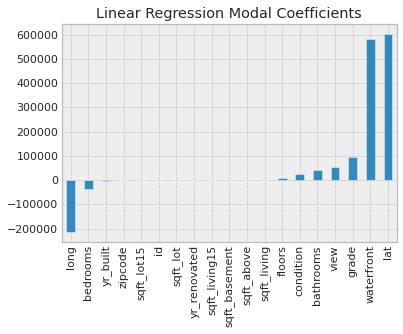

In [0]:
from pandas import Series, DataFrame

import matplotlib.pyplot as plt

%matplotlib inline
# This is confirmed with the coefficients of each model found below.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline
#checking the magnitude of coefficients

predictors = X.columns

linear_coef = Series(coef_dict_baseline).sort_values()

linear_coef.plot(kind='bar', title='Linear Regression Modal Coefficients')

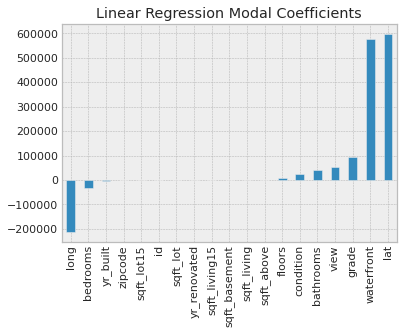

In [0]:
from pandas import Series, DataFrame

import matplotlib.pyplot as plt

%matplotlib inline
# This is confirmed with the coefficients of each model found below.
# 
ridge_coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,X.columns):
    ridge_coef_dict_baseline[feat] = coef
ridge_coef_dict_baseline

#checking the magnitude of coefficients

predictors = X.columns

linear_coef = Series(ridge_coef_dict_baseline).sort_values()

linear_coef.plot(kind='bar', title='Linear Regression Modal Coefficients')

##  Lasso Regression

In [0]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#data for model 2
X = housing_data.drop(['price'],axis=1)
y = housing_data[['price']]
X.shape,y.shape
# 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Importing StandardScaler
#
from sklearn.preprocessing import StandardScaler

# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# Importing linear models
# 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.6998524173262097
lasso MSE: 40504545639.722374
lasso coef: [ -3721.47034223 -33289.34283726  31706.64764677 259463.35492305
   5034.05245945   3655.73809075  50412.29416233  40686.90126547
  17100.95285177 112964.85055691 -83886.21166793 -58549.86597024
 -77085.30364978   7894.77484649 -31158.0401249   83471.60682443
 -29995.45369982  14811.69160008 -10818.04221963]


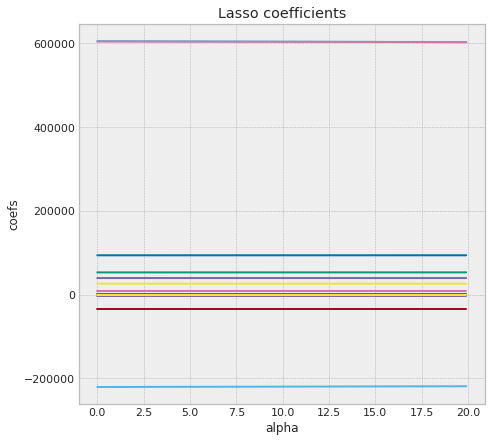

In [0]:
# Importing library for visualization
#
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

## ElasticNet Regression

In [0]:
# Importing our libraries
# 
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Elastic Net Model

# 
X=housing_data.drop(['price'],axis=1)
y=housing_data[['price']]
X.shape,y.shape

((21613, 19), (21613, 1))

In [0]:
# normalize data.  
# create the gridsearch.
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [0]:
# fit model 
#display the best parameters and the best results.
# 41050144976.83428()
search.fit(X,y)
search.best_params_
abs(search.best_score_)

41050144976.834305

In [0]:
# Elastic model performance
#79369724903.44846
elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)

79369724903.44844


In [0]:
#  the coefficients
# {'R&D Spend': 0.7833652863082342,'Administration': -0.01695518117671228,'Marketing Spend': 0.03294491814412594,'State': 37.26905179033893}
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 23092.633684478766,
 'bedrooms': 9155.706850633213,
 'condition': 5767.4043000180345,
 'floors': 14348.44365569336,
 'grade': 22211.44913638597,
 'id': -2.8171408216262623e-07,
 'lat': 117963.9962056058,
 'long': -19328.922662531582,
 'sqft_above': 26.881110376474908,
 'sqft_basement': 29.91274411705405,
 'sqft_living': 28.79838361623981,
 'sqft_living15': 31.194047363692714,
 'sqft_lot': 0.05852061105940594,
 'sqft_lot15': 0.06271155031177679,
 'view': 21945.40913751792,
 'waterfront': 143887.34516396764,
 'yr_built': -116.40479779912602,
 'yr_renovated': 14.756428305752625,
 'zipcode': -5.782181507028455}

## 8. Challenging the solution

In [0]:
# Reviewing the Solution 

In [0]:
hass.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [0]:
#Dropping columns with less importance
hass=hass.drop(['id','sqft_living', 'sqft_lot', 'sqft_above','sqft_basement','yr_renovated','sqft_living15','sqft_lot15'],axis=1)
hass.head(5)

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long
0,221900.000,3,1.000,1.000,0,0,3,7,1955,98178,47.511,-122.257
1,538000.000,3,2.250,2.000,0,0,3,7,1951,98125,47.721,-122.319
2,180000.000,2,1.000,1.000,0,0,3,6,1933,98028,47.738,-122.233
3,604000.000,4,3.000,1.000,0,0,5,7,1965,98136,47.521,-122.393
4,510000.000,3,2.000,1.000,0,0,3,8,1987,98074,47.617,-122.045


In [0]:
#splitting the data into target and features
X = hass.drop("price", axis=1)
y = hass[["price"]]
print(X.shape)
print(y.shape)

(21613, 11)
(21613, 1)


In [0]:
#standardize the dataset using StandardScaler function in scikit-learn. 
#the attributes are transformed to a standard gaussian distribution with a mean of 0 and a standard deviation of 1.
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler().fit(X)
scaled_X = scaler.transform(X)

In [0]:
#split the data into train and test set with scikit-learn’s train_test_split() function using a test_size parameter.
from sklearn.model_selection import train_test_split

seed      = 9
test_size = 0.20

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = test_size, random_state = seed)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17290, 11)
(4323, 11)
(17290, 1)
(4323, 1)


In [0]:
# regression models offered by scikit-learn to produce a baseline accuracy for this problem. 
#the MSE (Mean Squared Error) as the performance metric for the regression models.
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
# user variables to tune
folds   = 10
metric  = "neg_mean_squared_error"

# hold different regression models in a single dictionary
models = {}
models["Linear"]        = LinearRegression()
models["Lasso"]         = Lasso()
models["ElasticNet"]    = ElasticNet()
models["ridge"] = Ridge(normalize=True)

Linear: -47279607999.472, 6069129995.918
Lasso: -47279621561.055, 6069202018.947
ElasticNet: -123820294692.005, 14870745077.495
ridge: -62838362563.087, 9234262701.847


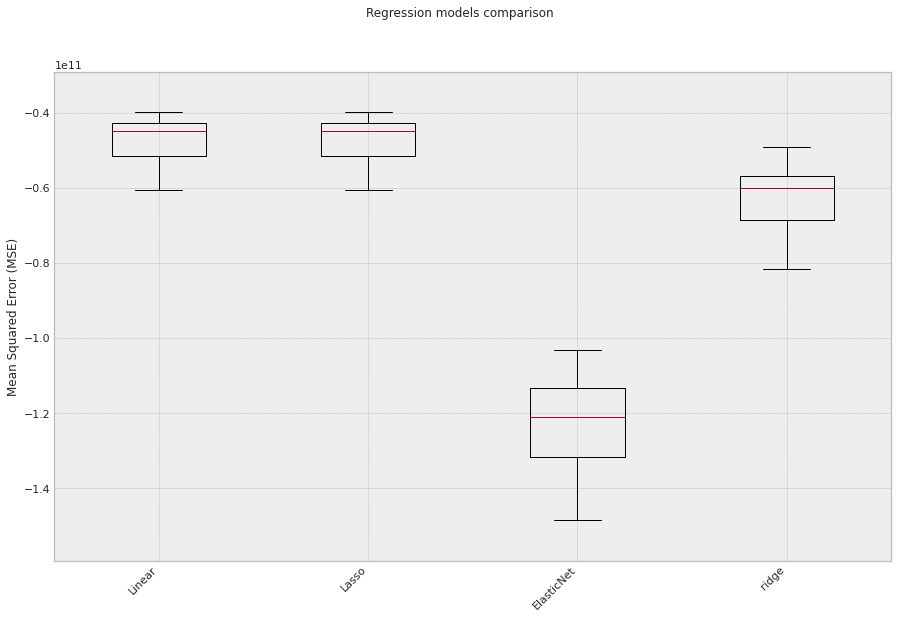

In [0]:
# 10-fold cross validation for each model
model_results = []
model_names   = []
for model_name in models:
    model   = models[model_name]
    k_fold  = KFold(n_splits=folds, random_state=seed)
    results = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=metric)

    model_results.append(results)
    model_names.append(model_name)
    print("{}: {}, {}".format(model_name, round(results.mean(), 3), round(results.std(), 3)))

# box-whisker plot to compare regression models
figure = plt.figure(figsize=(15,9))
figure.suptitle('Regression models comparison')
axis = figure.add_subplot(111)
plt.boxplot(model_results)
axis.set_xticklabels(model_names, rotation = 45, ha="right")
axis.set_ylabel("Mean Squared Error (MSE)")
plt.margins(0.05, 0.1)
plt.show()

## Choosing the best model

In [0]:
# create and fit the best regression model
best_model = Lasso(random_state=seed)
#best_model = LinearRegression()
#best_model = KNeighborsRegressor()
best_model.fit(X_train, y_train)
# make predictions using the model
predictions = best_model.predict(X_test)

In [0]:
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

In [0]:
gridlasso.fit(X_train, y_train) 

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=19.900000000000002, copy_X=True,
                             fit_intercept=True, max_iter=1000, normalize=False,
                             positive=False, precompute=False,
                             random_state=None, selection='cyclic', tol=0.0001,
                             warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.5,  3. ,
        3.5,  4. ,  4.5,  5. ,  6. ,  7. ,  8. ,  9. , 10. , 11. , 12. ,
       13. , 14. , 15. , 16. , 17. , 18. , 19. , 20. , 21. , 22. , 23. ,
       24. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [0]:
# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients

In [0]:
print("The best model had an  MSE : {}".format(round(mean_squared_error(y_test, predictions), 3)))
print("lasso score:", gridlasso.score(X_test, y_test))
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)

The best model had an  MSE : 47506933386.43
lasso score: 0.6611143980701025
lasso MSE: 47507002882.32068
lasso best estimator coef: [ 139626.23446001  953115.34434738   18383.32699406  602639.79416392
  276628.33776583   85966.43548471 2013030.75893669 -413275.02940367
 -121466.97336739  360211.49282731  -83419.44865267]


#### visualize the predictions made by our best model and the original targets Y_test

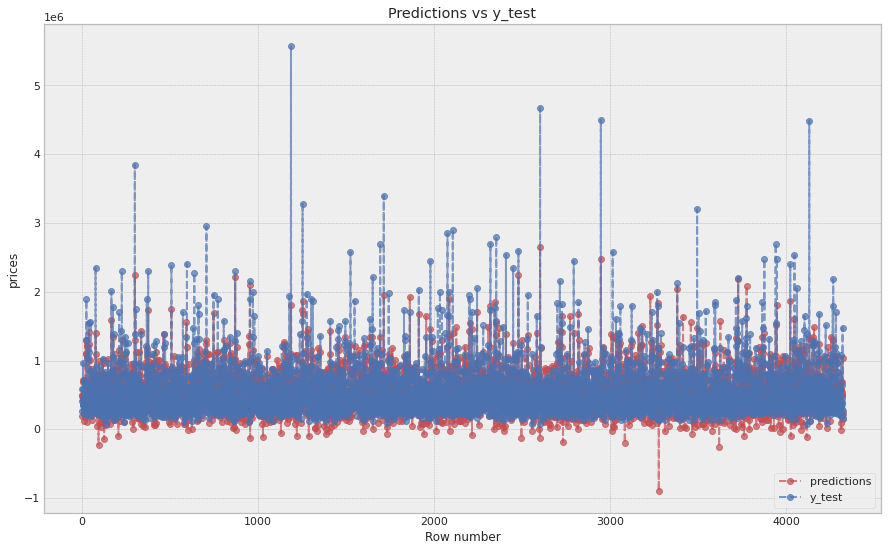

In [0]:
# plot between predictions and Y_test
import numpy as np
x_axis = np.array(range(0, predictions.shape[0]))
figure = plt.figure(figsize=(15,9))
plt.plot(x_axis, predictions, linestyle="--", marker="o", alpha=0.7, color='r', label="predictions")
plt.plot(x_axis, y_test, linestyle="--", marker="o", alpha=0.7, color='b', label="y_test")
plt.xlabel('Row number')
plt.ylabel('prices')
plt.title('Predictions vs y_test')
plt.legend(loc='lower right')
plt.show()

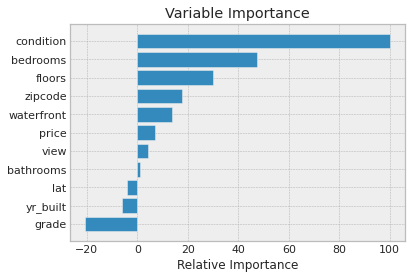

In [0]:
# plot model's feature importance
feature_importance = best_model.coef_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)
pos        = np.arange(sorted_idx.shape[0]) + .5

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, hass.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

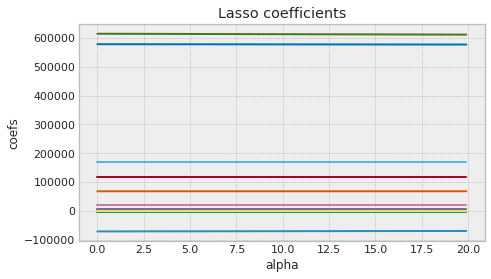

In [0]:
import warnings
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X,y)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,4))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')
plt.show()

# 9. Follow up questions

### a). Did we have the right data?

Yes

### b). Do we need other data to answer our question?

Yes,need more data to improve model performance

### c). Did we have the right question?

Yes